In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

Matplotlib is building the font cache; this may take a moment.


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 474 entries, Province/State to 5/5/21
dtypes: float64(2), int64(470), object(2)
memory usage: 1018.5+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Columns: 474 entries, Province/State to 5/5/21
dtypes: float64(2), int64(470), object(2)
memory usage: 1018.5+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,59015,59225,59370,59576,59745,59939,60122,60300,60563,60797
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,130606,130736,130859,130977,131085,131185,131238,131276,131327,131419
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,121112,121344,121580,121866,122108,122311,122522,122717,122999,123272
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,13083,13121,13148,13198,13232,13232,13282,13295,13316,13340
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,25710,25942,26168,26431,26652,26815,26993,27133,27284,27529


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


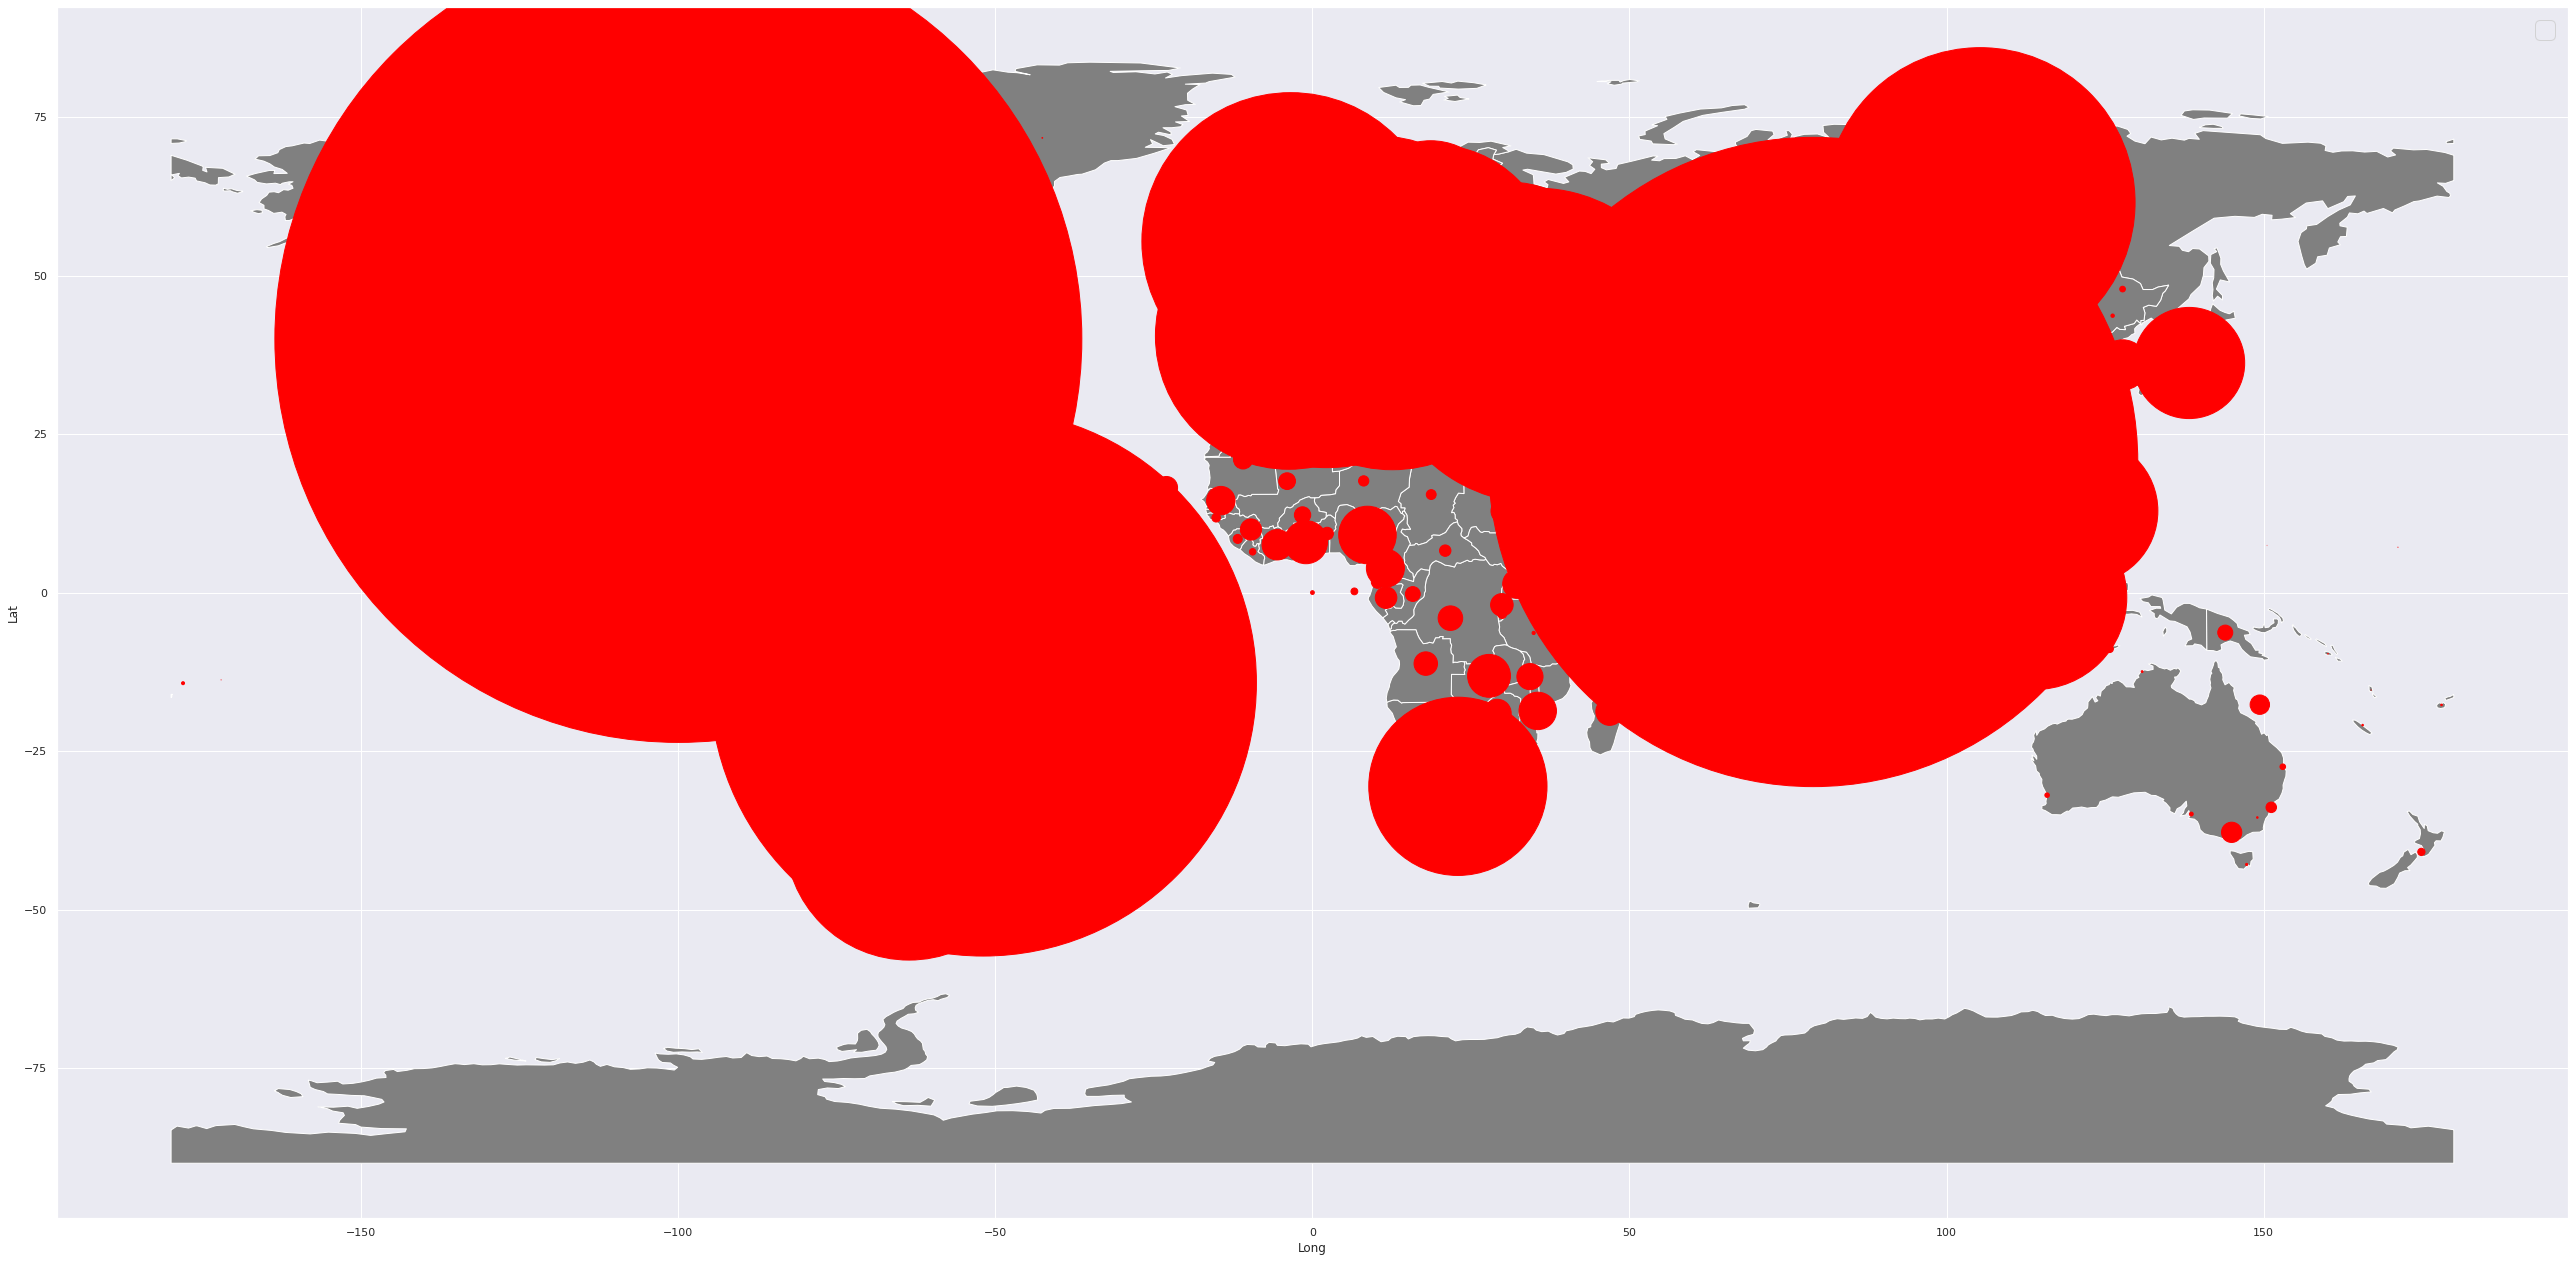

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/21,203009,0,3484042,150376,3025120,97206,13023892,112865,347827,170750
5/2/21,203009,0,3492679,150376,3051730,97232,13083550,113356,362043,173769
5/3/21,205467,0,3505717,150376,3053770,97249,13135143,114128,363041,176783
5/4/21,206319,0,3524194,150376,3075230,97266,13170561,114944,364859,179480


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/21,250991,364844,228477,6898,69198,213167,266861,45777,11072,107622
5/2/21,250991,365104,228684,6898,69198,213167,267455,45867,11313,108693
5/3/21,256676,365299,228871,6898,69727,214475,267681,46039,11471,109625
5/4/21,257980,365619,230095,6989,69727,215833,268070,46087,11706,110644


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/21,3231,6235,7543,182,2124,5318,3487,779,171,654
5/2/21,3231,6238,7558,182,2132,5318,3493,784,174,664
5/3/21,3290,6244,7578,182,2134,5367,3499,790,179,675
5/4/21,3310,6248,7606,183,2137,5386,3504,793,185,686


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/21,250991,364844,228477,6898,69198,213167,266861,45777,11072,107622
5/2/21,250991,365104,228684,6898,69198,213167,267455,45867,11313,108693
5/3/21,256676,365299,228871,6898,69727,214475,267681,46039,11471,109625
5/4/21,257980,365619,230095,6989,69727,215833,268070,46087,11706,110644


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
5/1/21,3231,6235,7543,182,2124,5318,3487,779,171,654
5/2/21,3231,6238,7558,182,2132,5318,3493,784,174,664
5/3/21,3290,6244,7578,182,2134,5367,3499,790,179,675
5/4/21,3310,6248,7606,183,2137,5386,3504,793,185,686


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
5/1/21,1.000000,1.000735,1.003540,1.000000,1.000000,1.003928,1.001125,1.004366,1.022912,1.008575
5/2/21,1.000000,1.000713,1.000906,1.000000,1.000000,1.000000,1.002226,1.001966,1.021767,1.009951
5/3/21,1.022650,1.000534,1.000818,1.000000,1.007645,1.006136,1.000845,1.003750,1.013966,1.008575
5/4/21,1.005080,1.000876,1.005348,1.013192,1.000000,1.006332,1.001453,1.001043,1.020486,1.009295


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1232,1232,1232,1232,1232,1232,1232,1232,1232,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,10220,10349,10349,10453,10453,10519,10576,10576,10576,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3828,3831,3838,3855,3863,3866,3881,3884,3915,POINT (-59.54320 13.19390)
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,12631,12639,12646,12668,12668,12668,12674,12675,12680,POINT (-88.49760 17.18990)
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,2215,2290,2360,2427,2575,2708,2854,3007,3182,POINT (-63.74430 44.68200)
92,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2804881,2824626,2841934,2859724,2877746,2893655,2905254,2919805,2934611,POINT (-74.29730 4.57090)
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,243167,245601,248382,250991,250991,250991,256676,257980,260535,POINT (-83.75340 9.74890)
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,103524,104512,105661,106707,107622,108693,109625,110644,111654,POINT (-77.78117 21.52176)
107,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,173,173,174,174,174,174,174,174,174,POINT (-61.37100 15.41500)
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,265481,265819,266214,266561,266861,267455,267681,268070,268561,POINT (-70.16270 18.73570)


In [37]:
temp.drop([24,47,92,107,121,122,126,137,182,193, 216, 218, 237, 250, 254, 255, 256, 262, 264, 269], axis=0, inplace=True)

In [38]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1232,1232,1232,1232,1232,1232,1232,1232,1232,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,10220,10349,10349,10453,10453,10519,10576,10576,10576,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3828,3831,3838,3855,3863,3866,3881,3884,3915,POINT (-59.54320 13.19390)
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,243167,245601,248382,250991,250991,250991,256676,257980,260535,POINT (-83.75340 9.74890)
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,103524,104512,105661,106707,107622,108693,109625,110644,111654,POINT (-77.78117 21.52176)
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,265481,265819,266214,266561,266861,267455,267681,268070,268561,POINT (-70.16270 18.73570)
111,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,68922,68922,69198,69198,69198,69198,69727,69727,69997,POINT (-88.89650 13.79420)
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,18826,19004,19099,19264,19404,19543,19543,19697,19882,POINT (-53.12580 3.93390)
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1720,1745,1745,1745,1745,1745,1745,1745,1745,POINT (-63.05010 18.07080)
138,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,223025,224621,226247,227671,228477,228684,228871,230095,231289,POINT (-90.23080 15.78350)


In [39]:
len(temp)

22

In [40]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [41]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'5/4/21'

In [42]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [43]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [44]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [45]:
cases_camcar_all

,Province/State,Country/Region,5/4/21,5/5/21
0,NaN,Panama,365619,365975
1,NaN,Dominican Republic,268070,268561
2,NaN,Costa Rica,257980,260535
3,NaN,Guatemala,230095,231289
4,NaN,Honduras,215833,216964
5,NaN,Cuba,110644,111654
6,NaN,El Salvador,69727,69997
7,NaN,Jamaica,46087,46194
8,French Guiana,France,19697,19882
9,NaN,Guyana,13656,13829


In [46]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [47]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [48]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [49]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,198,198,198,198,199,199,209,210,210,210
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,44,44,44,44,44,44,44,44,45,45
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,322,322,323,323,323,323,323,323,323,323
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,67,67,67,67,67,67,67,67,69,69
92,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,71799,72235,72725,73230,73720,73992,74477,75164,75627,76015
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3168,3186,3202,3217,3231,3231,3231,3290,3310,3326
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,597,604,614,632,644,654,664,675,686,694
107,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,3459,3462,3467,3471,3480,3487,3493,3499,3504,3509


In [52]:
temp_deaths.drop([24,47,92,107,121,122,126,137,182,193, 216, 218, 237, 250, 254, 255, 256, 262, 264, 269], axis=0, inplace=True)

In [53]:

temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,198,198,198,198,199,199,209,210,210,210
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,44,44,44,44,44,44,44,44,45,45
96,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,3168,3186,3202,3217,3231,3231,3231,3290,3310,3326
99,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,597,604,614,632,644,654,664,675,686,694
108,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,3459,3462,3467,3471,3480,3487,3493,3499,3504,3509
111,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,2106,2111,2117,2120,2124,2124,2132,2134,2137,2141
119,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,98,98,100,100,100,100,101,101,104,104
128,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
138,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,7428,7453,7478,7500,7524,7543,7558,7578,7606,7642


In [54]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [55]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'5/4/21'

In [56]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [57]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [58]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [59]:
deaths_camcar_all

,Province/State,Country/Region,5/4/21,5/5/21
0,NaN,Guatemala,7606,7642
1,NaN,Panama,6248,6252
2,NaN,Honduras,5386,5439
3,NaN,Dominican Republic,3504,3509
4,NaN,Costa Rica,3310,3326
5,NaN,El Salvador,2137,2141
6,NaN,Jamaica,793,794
7,NaN,Cuba,686,694
8,NaN,Guyana,306,308
9,NaN,Haiti,257,260


In [60]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [61]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1002,1014,1014,1014,1014,1014,1014,1014,1014,1014
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,9326,9326,9421,9421,9494,9494,9561,9579,9579,9579
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3735,3746,3750,3759,3768,3783,3800,3804,3817,3821
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,12185,12193,12198,12208,12218,12218,12218,12239,12254,12261
77,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,2602489,2616821,2632699,2650643,2669308,2686399,2700594,2721317,2737757,2754940
81,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,201264,201784,202215,202593,203009,203009,203009,205467,206319,209335
84,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,96322,97462,98536,99630,100603,101475,102339,103256,104326,105312
92,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,171,171,171,172,172,172,172,172,172,172
93,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,222174,222466,223472,224746,226392,227267,227924,228460,229368,229453
96,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,64405,64667,64667,64876,64876,64876,64876,65264,65264,65531


In [63]:
temp_recovered.drop([24,77,92,106,107,111,122,167,178,201,203,222,235,239,240,241,247,249,254], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [64]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,1002,1014,1014,1014,1014,1014,1014,1014,1014,1014
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,9326,9326,9421,9421,9494,9494,9561,9579,9579,9579
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,3735,3746,3750,3759,3768,3783,3800,3804,3817,3821
81,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,201264,201784,202215,202593,203009,203009,203009,205467,206319,209335
84,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,96322,97462,98536,99630,100603,101475,102339,103256,104326,105312
93,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,222174,222466,223472,224746,226392,227267,227924,228460,229368,229453
96,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,64405,64667,64667,64876,64876,64876,64876,65264,65264,65531
104,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
113,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
123,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,197600,199005,200241,201621,202843,204141,205365,206217,207862,209096


In [65]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'5/4/21'

In [66]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,5/4/21,5/5/21
0,NaN,Panama,355499,355828
1,NaN,Dominican Republic,229368,229453
2,NaN,Costa Rica,206319,209335
3,NaN,Guatemala,207862,209096
4,NaN,Cuba,104326,105312
5,NaN,Honduras,79350,79925
6,NaN,El Salvador,65264,65531
7,NaN,Jamaica,21646,21779
8,NaN,Haiti,12151,12151
9,Curacao,Netherlands,11816,11864


In [67]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [68]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [69]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [70]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1228,1232,1232,1232,1232,1232,1232,1232,1232,1232
1,Bahamas,0,0,0,0,0,0,0,0,0,...,10220,10220,10349,10349,10453,10453,10519,10576,10576,10576
2,Barbados,0,0,0,0,0,0,0,0,0,...,3825,3828,3831,3838,3855,3863,3866,3881,3884,3915
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,241240,243167,245601,248382,250991,250991,250991,256676,257980,260535
4,Cuba,0,0,0,0,0,0,0,0,0,...,102441,103524,104512,105661,106707,107622,108693,109625,110644,111654
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,265403,265481,265819,266214,266561,266861,267455,267681,268070,268561
6,El Salvador,0,0,0,0,0,0,0,0,0,...,68468,68922,68922,69198,69198,69198,69198,69727,69727,69997
7,French Guiana,0,0,0,0,0,0,0,0,0,...,18826,18826,19004,19099,19264,19404,19543,19543,19697,19882
8,St Martin,0,0,0,0,0,0,0,0,0,...,1720,1720,1745,1745,1745,1745,1745,1745,1745,1745
9,Guatemala,0,0,0,0,0,0,0,0,0,...,221939,223025,224621,226247,227671,228477,228684,228871,230095,231289


In [71]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,32,32,32,32,32,32,32,32,32,32
1,Bahamas,0,0,0,0,0,0,0,0,0,...,198,198,198,198,199,199,209,210,210,210
2,Barbados,0,0,0,0,0,0,0,0,0,...,44,44,44,44,44,44,44,44,45,45
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,3168,3186,3202,3217,3231,3231,3231,3290,3310,3326
4,Cuba,0,0,0,0,0,0,0,0,0,...,597,604,614,632,644,654,664,675,686,694
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,3459,3462,3467,3471,3480,3487,3493,3499,3504,3509
6,El Salvador,0,0,0,0,0,0,0,0,0,...,2106,2111,2117,2120,2124,2124,2132,2134,2137,2141
7,French Guiana,0,0,0,0,0,0,0,0,0,...,98,98,100,100,100,100,101,101,104,104
8,St Martin,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12
9,Guatemala,0,0,0,0,0,0,0,0,0,...,7428,7453,7478,7500,7524,7543,7558,7578,7606,7642


In [72]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,1002,1014,1014,1014,1014,1014,1014,1014,1014,1014
1,Bahamas,0,0,0,0,0,0,0,0,0,...,9326,9326,9421,9421,9494,9494,9561,9579,9579,9579
2,Barbados,0,0,0,0,0,0,0,0,0,...,3735,3746,3750,3759,3768,3783,3800,3804,3817,3821
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,201264,201784,202215,202593,203009,203009,203009,205467,206319,209335
4,Cuba,0,0,0,0,0,0,0,0,0,...,96322,97462,98536,99630,100603,101475,102339,103256,104326,105312
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,222174,222466,223472,224746,226392,227267,227924,228460,229368,229453
6,El Salvador,0,0,0,0,0,0,0,0,0,...,64405,64667,64667,64876,64876,64876,64876,65264,65264,65531
7,French Guiana,0,0,0,0,0,0,0,0,0,...,9995,9995,9995,9995,9995,9995,9995,9995,9995,9995
8,St Martin,0,0,0,0,0,0,0,0,0,...,1399,1399,1399,1399,1399,1399,1399,1399,1399,1399
9,Guatemala,0,0,0,0,0,0,0,0,0,...,197600,199005,200241,201621,202843,204141,205365,206217,207862,209096


In [73]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [74]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [75]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [76]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [77]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [78]:
cases_camcar_all.shape

(432, 22)

In [79]:
recovered_camcar_all.shape

(432, 22)

In [80]:
deaths_camcar_all.shape

(432, 22)

In [81]:
active_camcar_all.shape

(432, 22)